
<img style="float: right;" src="data/earth.png" width= "100" height = "100">


# 4. Kinderscout Delta example [work in progress]




_____________

### 1. Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import matplotlib as mp
import mplstereonet as mpl
from shapely.geometry import Point
from matplotlib.markers import MarkerStyle

pd.options.mode.chained_assignment = None  
%config InlineBackend.figure_format='retina'

### 2. Load shapefile as geodataframe, assign coordinate system and filter by Formation

In [7]:
import geopandas as gpd
geo_map = gpd.read_file('shp/kinder_map.shp')
geo_map.to_crs(epsg = 27700, inplace = True)



In [8]:
kinder = geo_map[(geo_map.LEX_D == 'KINDERSCOUT GRIT') | (geo_map.LEX_D == 'HEBDEN FORMATION')]

### 3. Load CSV as dataframe and convert to geodataframe

In [20]:
beds = pd.read_csv('data/upper_beds.csv')

def prep(data):

    data.columns = data.columns.str.lstrip()
    geometry = [Point(xy) for xy in zip(data.longitude, data.latitude)]

    data['geometry'] = geometry
    data = data.set_geometry('geometry')
    data.crs = {'init': 'epsg:4326'}
    data.to_crs(epsg = 27700, inplace = True)
    data['dist'] = np.cumsum(data.distance(data.shift()))
    
    return data

df = prep(beds)

<AxesSubplot:>

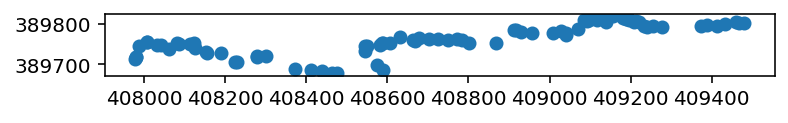

In [21]:
df.plot()

### 4. Filter data by sequences at known distances along outcrop

In [10]:
lower = df[df.dist < 1200]
upper = df[df.dist >= 1200]

### 5. Plot stereonet of bedding

Text(360, 100, 'Upper\nN = 27\nMean dip: 225\nMean strike: 135')

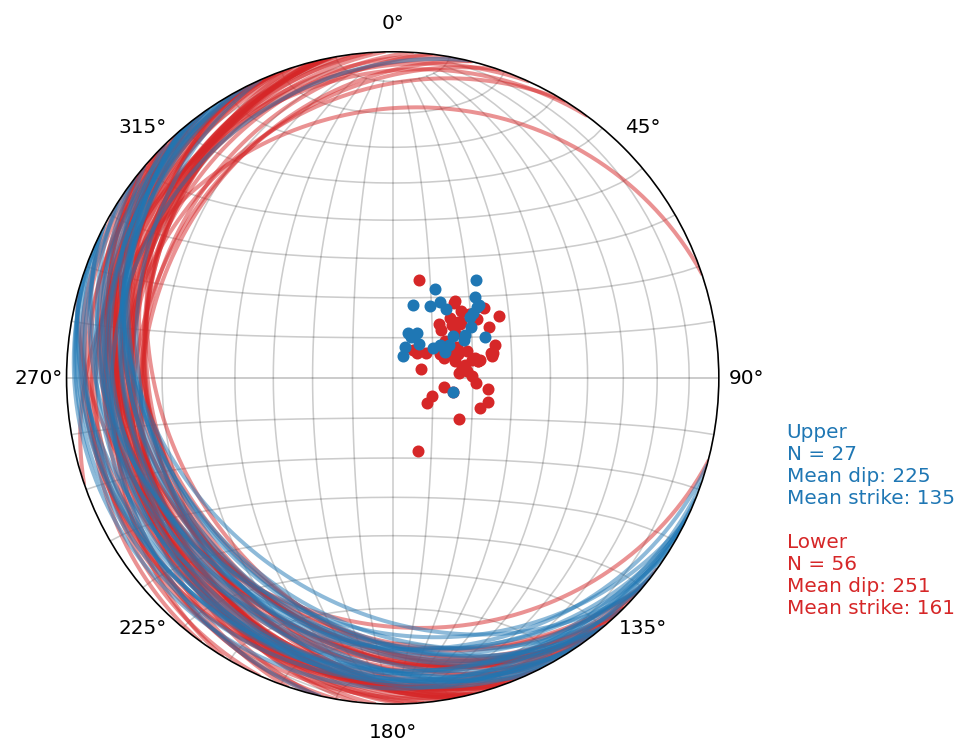

In [11]:
fig, ax = mpl.subplots(figsize = (9, 6))
ax.grid(color = 'k', alpha = 0.2)

strike1, dip1, azi1 = lower.strike, lower.dip, lower.dipAzimuth
strike2, dip2, azi2 = upper.strike, upper.dip, upper.dipAzimuth

ax.plane(strike1, dip1, color = 'tab:red', linewidth = 2, alpha = 0.5)
ax.pole(strike1, dip1, color = 'tab:red',  marker = 'o', markersize = 5, alpha = 1)
note = f"Lower\nN = {dip1.size}\nMean dip: {azi1.mean():.0f}\nMean strike: {strike1.mean():.0f}"
ax.annotate(note, xy = (5 * 72, 45), color = 'tab:red', xycoords='axes points')

ax.plane(strike2, dip2, color = 'tab:blue', linewidth = 2, alpha = 0.5)
ax.pole(strike2, dip2, color = 'tab:blue',  marker = 'o', markersize = 5, alpha = 1)
note = f"Upper\nN = {dip2.size}\nMean dip: {azi2.mean():.0f}\nMean strike: {strike2.mean():.0f}"
ax.annotate(note, xy = (5 * 72, 100), color = 'tab:blue', xycoords='axes points')

### 5. Shift points to plot dip ticks

In [12]:
def dip_ticks(data):
    
    data_copy = data.copy()

    dx = 5.0 * (np.cos(np.deg2rad(-90))) 
    dy = 5.0 * (np.sin(np.deg2rad(-90)))

    data_copy['x_shifted'] = data_copy.geometry.x + dx
    data_copy['y_shifted'] = data_copy.geometry.y + dy

    geometry = [Point(xy) for xy in zip(data_copy.x_shifted, data_copy.y_shifted)]

    data_copy['geometry_shifted'] = geometry
    data_copy = data_copy.set_geometry('geometry_shifted')
    
    return data_copy

upper_dips = dip_ticks(upper)
lower_dips = dip_ticks(lower)

### 5. Plot bedding on geological map

[(407778.4618255812, 409779.6541858462),
 (389579.39591582055, 389918.27663095953),
 Text(0.5, 1.0, 'Kinderscout Delta Structure')]

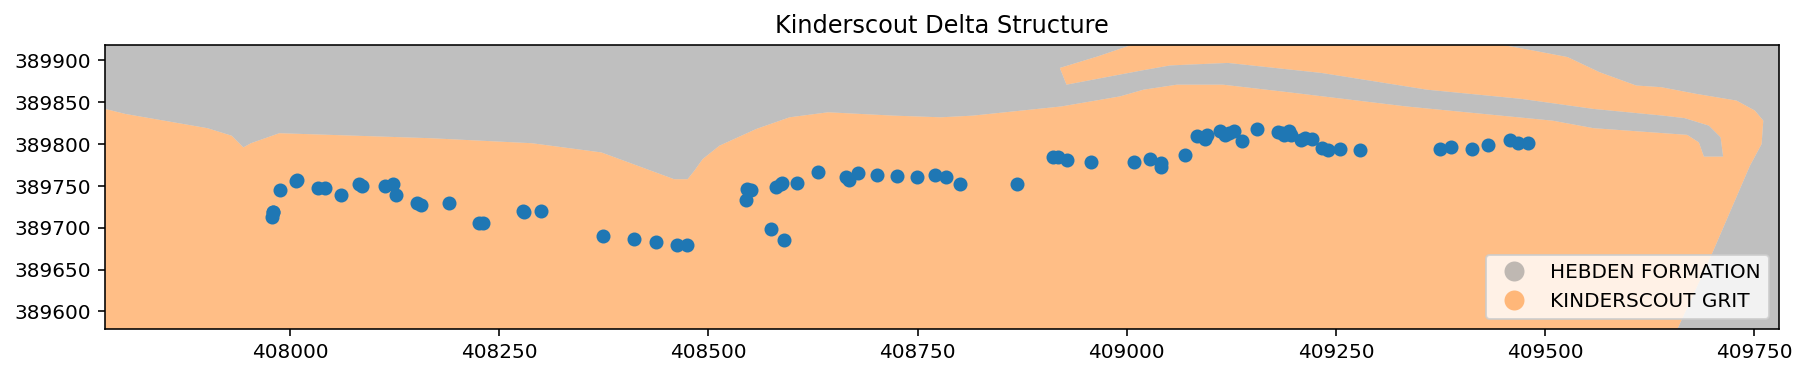

In [16]:
# def strike_dip(strike_data, dip_data, color, ax):
    
#     ax = ax

#     for index, row in strike_data.iterrows():

#         strike_angle = row.strike
#         t = mp.markers.MarkerStyle(marker='|')
#         t._transform = t.get_transform().rotate_deg(strike_angle*-1)
#         strike_data.loc[[index]].plot(c = color, marker = t, markersize = 300, ax = ax)

#         dip_angle = row.strike
#         t = mp.markers.MarkerStyle(marker='|')
#         t._transform = t.get_transform().rotate_deg(dip_angle*-1 + 90)
#         dip_data.loc[[index]].plot(color = color, marker= t, markersize = 20, ax = ax)
        
fig, ax = plt.subplots(figsize = (15, 6))

cmap = mp.colors.ListedColormap(['grey', 'tab:orange'])

kinder.plot(column = 'LEX_D', cmap = cmap, legend = True, 
            legend_kwds = {'loc':'lower right'}, alpha = 0.5, ax = ax)

df.plot(ax = ax)

# strike_dip(lower, lower_dips, 'tab:red', ax)
# strike_dip(upper, upper_dips, 'tab:blue', ax)

ax.set(xlim = (df.geometry.x.min() - 200, df.geometry.x.max() + 300),
           ylim = (df.geometry.y.min() - 100, df.geometry.y.max() + 100),
      title = 'Kinderscout Delta Structure')

## Cuts

In [ ]:
# fig, ax = plt.subplots(figsize = (15, 6))

# kinder.plot(alpha = 0.5, color = 'tab:orange', ax = ax)

# def strike_dip(strike_data, dip_data):

# for index, row in strike_data.iterrows():

#     strike_angle = row.strike
#     t = mp.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(strike_angle*-1)
#     strike_data.loc[[index]].plot(c = 'tab:red', marker = t, markersize = 300, ax = ax)
    
#     dip_angle = row.strike
#     t = mp.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(dip_angle*-1 + 90)
#     dip_data.loc[[index]].plot(color = 'tab:red', marker= t, markersize = 20, ax = ax)

# for index, row in upper.iterrows():
    
#     strike_angle = row.strike
#     t = mp.markers.MarkerStyle(marker='|')    
#     t._transform = t.get_transform().rotate_deg(strike_angle*-1)
#     upper.loc[[index]].plot(color = 'tab:blue', marker = t, markersize = 300, ax = ax)

#     dip_angle = row.strike
#     t = mp.markers.MarkerStyle(marker='|')
#     t._transform = t.get_transform().rotate_deg(dip_angle*-1 + 90)
#     upper_dips.loc[[index]].plot(color = 'tab:blue', marker= t, markersize = 20, ax = ax)

# ax.set(xlim = (df.geometry.x.min() - 200, df.geometry.x.max() + 300),
#            ylim = (df.geometry.y.min() - 100, df.geometry.y.max() + 100))

In [ ]:
# upper = df[df.dist >= 1200]

# dx = 0.0 * np.cos(np.deg2rad(180))  
# dy = 10.0 * np.sin(np.deg2rad(90))
# upper['x_shifted'] = upper.geometry.x - dx
# upper['y_shifted'] = upper.geometry.y - dy

# geometry = [Point(xy) for xy in zip(upper.x_shifted, upper.y_shifted)]

# upper['geometry_shifted'] = geometry